In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load dataset
file_path = "crime_dataset_india.csv"
df = pd.read_csv(file_path)


In [3]:
# 🔹 STEP 1: PARSE DATE COLUMNS
# -----------------------------
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce', dayfirst=True)
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce', dayfirst=True)
df['Time of Occurrence'] = pd.to_datetime(df['Time of Occurrence'], errors='coerce', dayfirst=True)
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce', dayfirst=True)


In [4]:
# 🔹 STEP 2: REMOVE CRITICAL NULLS
# --------------------------------
# Drop rows where essential date or city is missing
df = df.dropna(subset=['Date of Occurrence', 'City'])

In [5]:
# 🔹 STEP 3: HANDLE NON-CRITICAL MISSING DATA
# ----------------------------------------

# Replace missing text fields with "Unknown"
text_columns = ['Crime Description', 'Crime Domain', 'City', 'Weapon Used', 'Victim Gender']
for col in text_columns:
    df[col] = df[col].fillna('Unknown')

# Replace missing numeric values
if 'Victim Age' in df.columns:
    avg_age = df['Victim Age'].mean()
    df['Victim Age'] = df['Victim Age'].fillna(round(avg_age))

# Fill missing Case Closed status with "No"
if 'Case Closed' in df.columns:
    df['Case Closed'] = df['Case Closed'].fillna('No')


In [6]:
# 🔹 STEP 4: FEATURE ENGINEERING
# ------------------------------
df['Year'] = df['Date of Occurrence'].dt.year
df['Month'] = df['Date of Occurrence'].dt.month
df['Day of Week'] = df['Date of Occurrence'].dt.day_name()
df['Closure Time (Days)'] = (df['Date Case Closed'] - df['Date of Occurrence']).dt.days
df['Closure Time (Days)'] = df['Closure Time (Days)'].fillna(0)


In [7]:
# 🔹 STEP 5: VISUALIZATION
# ------------------------------
sns.set(style="whitegrid")


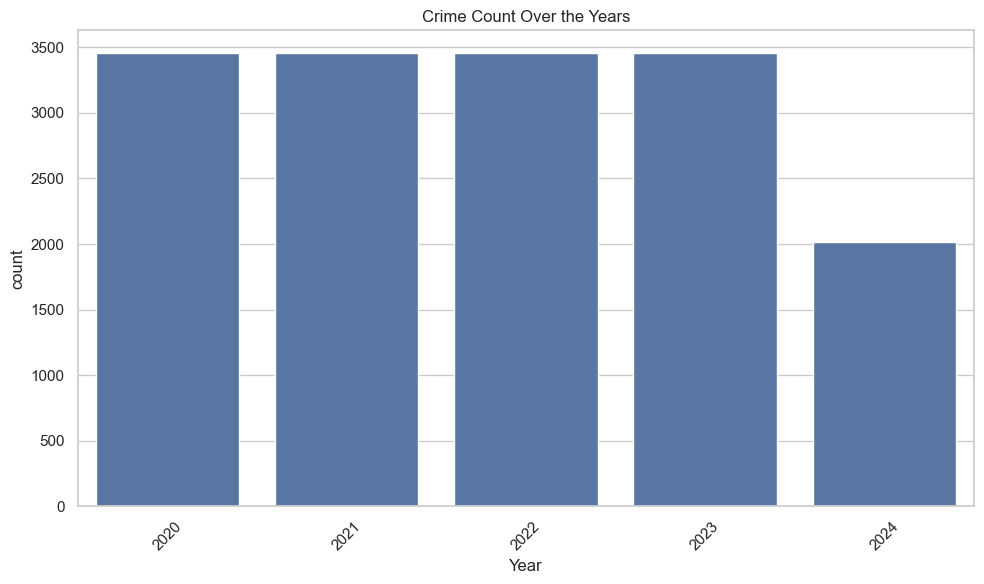

In [8]:
# 1. Crime Count Over the Years
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].dropna().unique()))
plt.title("Crime Count Over the Years")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("1_crime_by_year.png")

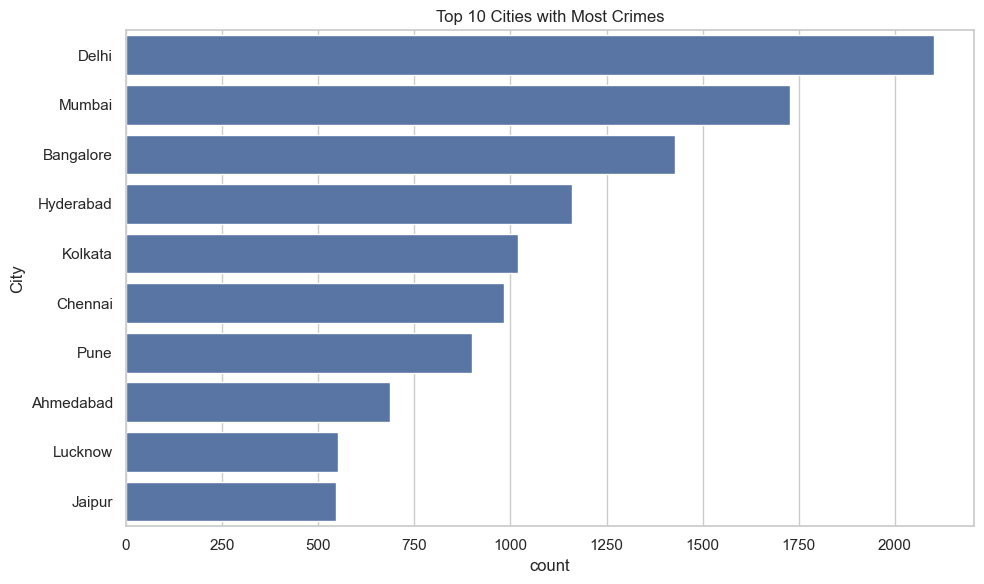

In [9]:
# 2. Top 10 Cities with Most Crimes
top_cities = df['City'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['City'].isin(top_cities)], y='City', order=top_cities)
plt.title("Top 10 Cities with Most Crimes")
plt.tight_layout()
plt.savefig("2_crime_by_city.png")

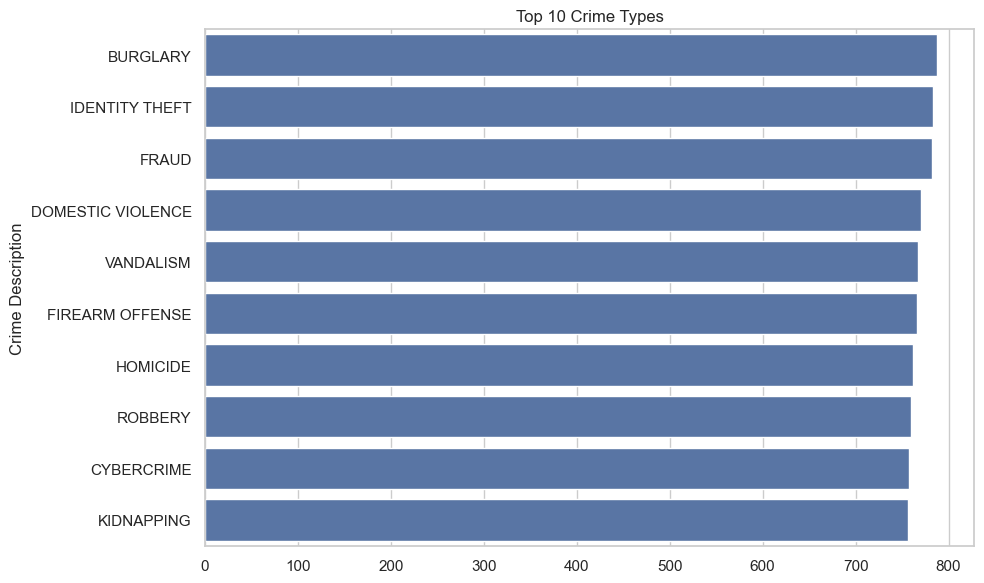

In [10]:
# 3. Top 10 Crime Types
top_types = df['Crime Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_types.values, y=top_types.index)
plt.title("Top 10 Crime Types")
plt.tight_layout()
plt.savefig("3_crime_by_type.png")


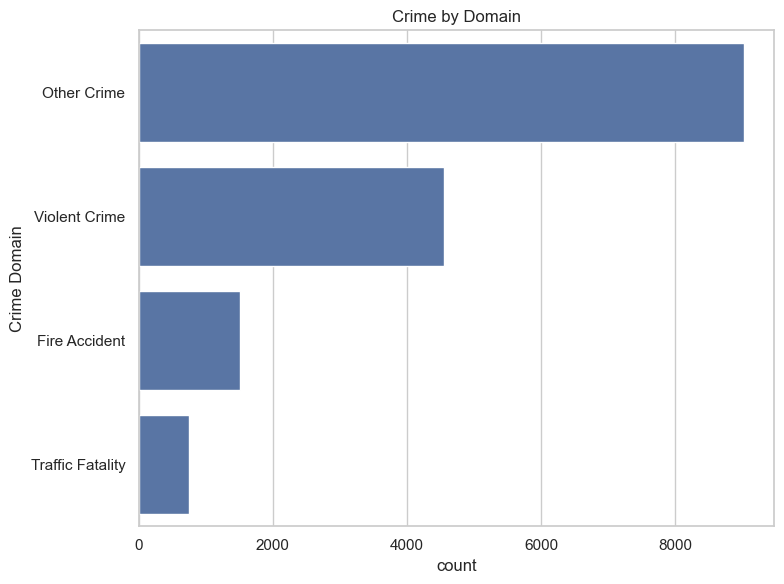

In [11]:
# 4. Crime by Domain
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Crime Domain', order=df['Crime Domain'].value_counts().index)
plt.title("Crime by Domain")
plt.tight_layout()
plt.savefig("4_crime_by_domain.png")

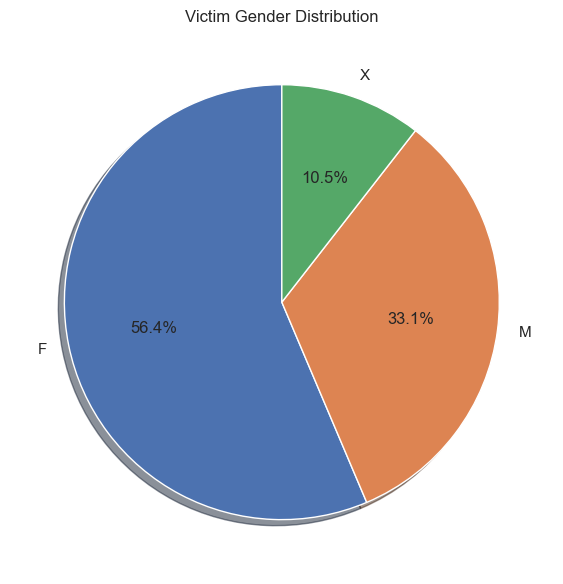

In [12]:
# 5. Victim Gender Distribution
plt.figure(figsize=(6, 6))
df['Victim Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Victim Gender Distribution")
plt.ylabel('')
plt.tight_layout()
plt.savefig("5_victim_gender.png")

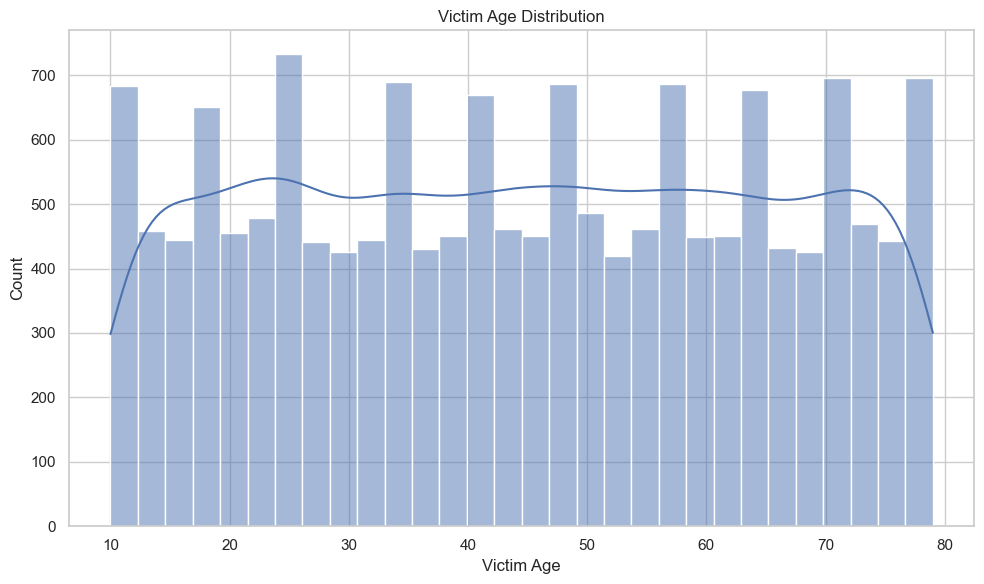

In [13]:
# 6. Victim Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Victim Age'], bins=30, kde=True)
plt.title("Victim Age Distribution")
plt.tight_layout()
plt.savefig("6_victim_age.png")

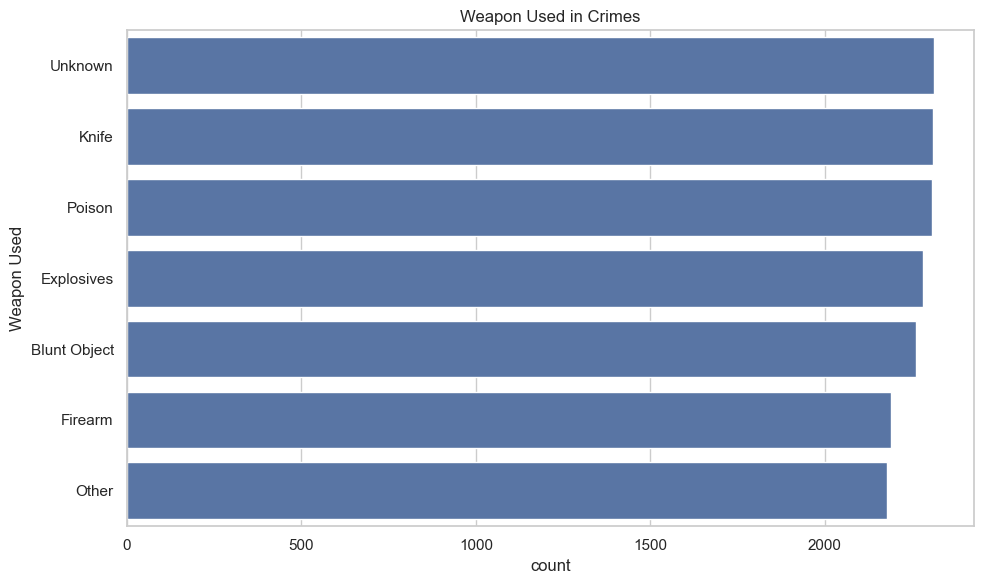

In [14]:
# 7. Weapon Used in Crimes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Weapon Used', order=df['Weapon Used'].value_counts().index)
plt.title("Weapon Used in Crimes")
plt.tight_layout()
plt.savefig("7_weapon_used.png")

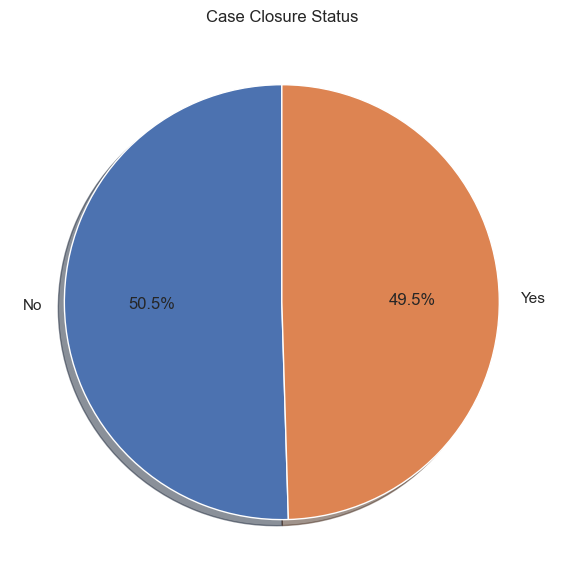

In [15]:
# 8. Case Closure Status
plt.figure(figsize=(6, 6))
df['Case Closed'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Case Closure Status")
plt.ylabel('')
plt.tight_layout()
plt.savefig("8_case_closure.png")

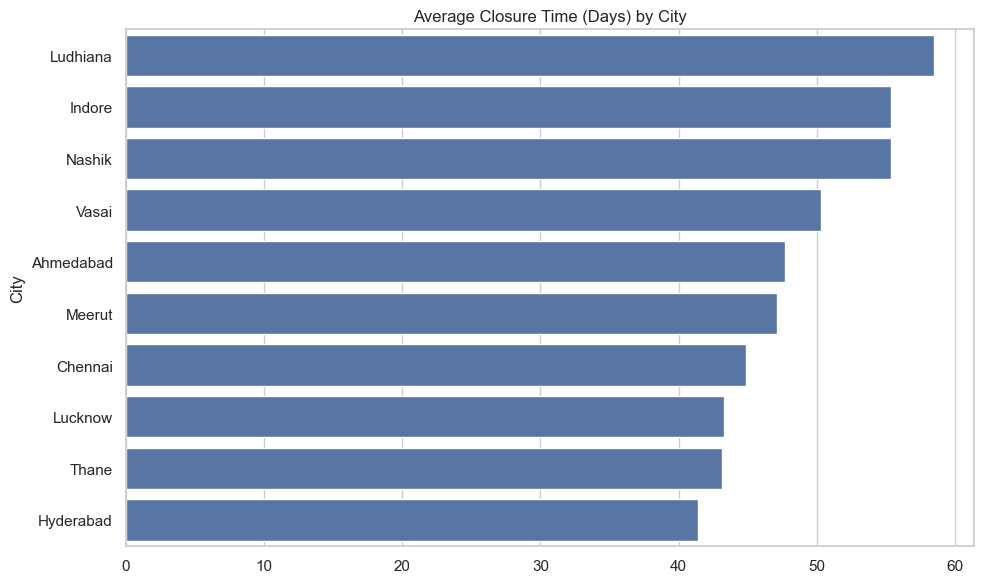

In [16]:
# 9. Average Closure Time by City
avg_closure_time = df.groupby('City')['Closure Time (Days)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_closure_time.values, y=avg_closure_time.index)
plt.title("Average Closure Time (Days) by City")
plt.tight_layout()
plt.savefig("9_closure_time_city.png")

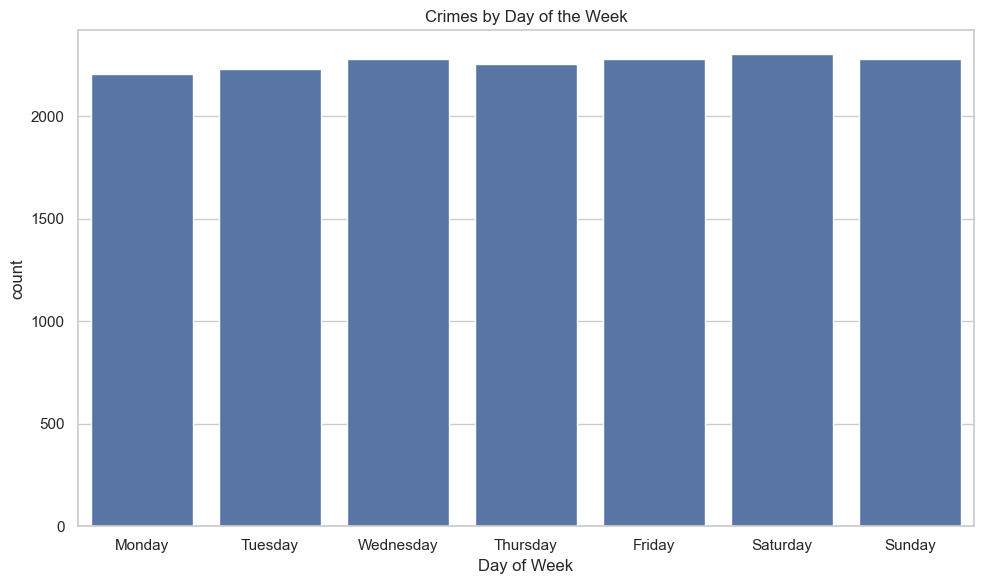

In [17]:
# 10. Crimes by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day of Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Crimes by Day of the Week")
plt.tight_layout()
plt.savefig("10_crime_by_day.png")

In [18]:
# Save the cleaned and fully handled data
df.to_csv("cleaned_crime_data_final.csv", index=False)